In [1]:
!python --version

Python 3.11.5


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("canada_per_capita_income.csv")
data.shape

(47, 2)

In [4]:
data.dtypes

year                         int64
per capita income (US$)    float64
dtype: object

In [5]:
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [6]:
data.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


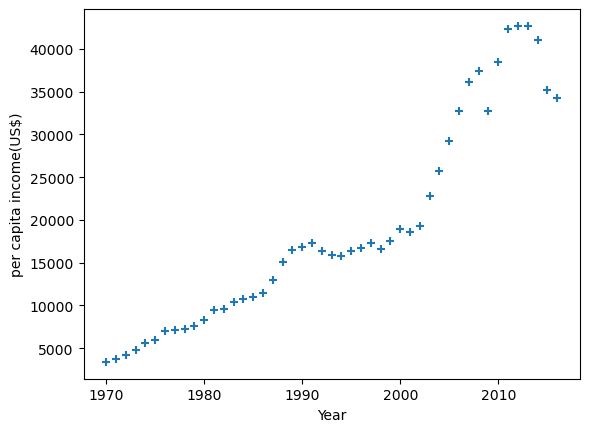

In [7]:
# plot the data to analyse the trend
plt.xlabel("Year")
plt.ylabel("per capita income(US$)")
plt.scatter(data.year, data["per capita income (US$)"], marker="+")
plt.show()

In [8]:
# import linear regression model
from sklearn.linear_model import LinearRegression

lrg = LinearRegression()
lrg.fit(data[["year"]].values, data["per capita income (US$)"])

LinearRegression()

In [9]:
lrg.predict(data[["year"]].values)

array([ -134.55966672,   693.9054085 ,  1522.37048373,  2350.83555895,
        3179.30063417,  4007.7657094 ,  4836.23078462,  5664.69585984,
        6493.16093506,  7321.62601029,  8150.09108551,  8978.55616073,
        9807.02123595, 10635.48631118, 11463.9513864 , 12292.41646162,
       13120.88153685, 13949.34661207, 14777.81168729, 15606.27676251,
       16434.74183774, 17263.20691296, 18091.67198818, 18920.1370634 ,
       19748.60213863, 20577.06721385, 21405.53228907, 22233.9973643 ,
       23062.46243952, 23890.92751474, 24719.39258996, 25547.85766519,
       26376.32274041, 27204.78781563, 28033.25289085, 28861.71796608,
       29690.1830413 , 30518.64811652, 31347.11319175, 32175.57826697,
       33004.04334219, 33832.50841741, 34660.97349264, 35489.43856786,
       36317.90364308, 37146.3687183 , 37974.83379353])

In [10]:
lrg.predict([[2020]])

array([41288.69409442])

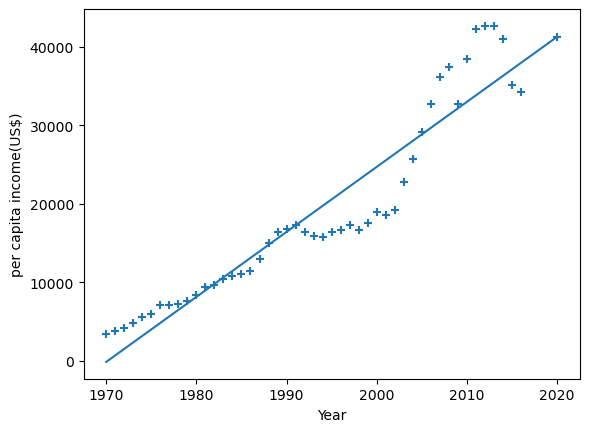

In [22]:
# plot the data to analyse the trend
plt.xlabel("Year")
plt.ylabel("per capita income(US$)")
plt.scatter(data.year, data["per capita income (US$)"], marker="+")
plt.plot(data.year, lrg.predict(data[["year"]].values))
plt.show()

In [12]:
data.tail(1)

,year,per capita income (US$)
46,2016,34229.19363


In [13]:
data.loc[47,"year"] = 2020
data.loc[47,"per capita income (US$)"] = lrg.predict([[2020]])

In [14]:
data.tail()

,year,per capita income (US$)
43,2013.0,42676.468370
44,2014.0,41039.893600
45,2015.0,35175.188980
46,2016.0,34229.193630
47,2020.0,41288.694094


In [15]:
# data["year"] = [int(x) for x in data["year"]]
data["year"] = data["year"].apply(lambda x: int(x))

In [16]:
data.tail()

,year,per capita income (US$)
43,2013,42676.468370
44,2014,41039.893600
45,2015,35175.188980
46,2016,34229.193630
47,2020,41288.694094


## HOw to use .apply(lambda x: ) to use in column wise

In [17]:
d = pd.DataFrame({
    'a':[1,2,3,4],
    'b':[1,2,3,4]
})
d.head()

,a,b
0,1,1
1,2,2
2,3,3
3,4,4


In [18]:
d['new'] = d.apply(lambda row: row['a']+row['b'], axis=1)
d

,a,b,new
0,1,1,2
1,2,2,4
2,3,3,6
3,4,4,8


In [20]:
data.tail()

,year,per capita income (US$)
43,2013,42676.468370
44,2014,41039.893600
45,2015,35175.188980
46,2016,34229.193630
47,2020,41288.694094


In [21]:
data["news"] = data.apply(lambda row: str(row['year'])+" - "+str(row["per capita income (US$)"]), axis=1)
data.tail()

,year,per capita income (US$),news
43,2013,42676.468370,2013.0 - 42676.46837
44,2014,41039.893600,2014.0 - 41039.8936
45,2015,35175.188980,2015.0 - 35175.18898
46,2016,34229.193630,2016.0 - 34229.19363
47,2020,41288.694094,2020.0 - 41288.69409441762
